In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [3]:
mortalidad=pd.read_csv(r"C:\Users\GPSantana\Downloads\Tasa de mortalidad.csv",sep=';',encoding='latin1')

mortalidad =mortalidad[mortalidad['Sexo'] == 'Ambos sexos'].copy()

mortalidad['Total'] = (
    mortalidad['Total']
    .astype(str)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

def edad_a_int(edad):
    if isinstance(edad, str):
        if "100" in edad:
            return 100
        nums = ''.join(c for c in edad if c.isdigit())
        if nums:
            return int(nums)
    return None

mortalidad['Edad_num'] = mortalidad['Edad'].apply(edad_a_int)
mortalidad = mortalidad[mortalidad['Edad_num'].notna()].copy()

def grupo_quinquenal(edad):
    if edad >= 100:
        return "100 y más"
    start = (edad // 5) * 5
    end = start + 4
    return f"{start}-{end}"

mortalidad['Edad (grupos quinquenales)'] = mortalidad['Edad_num'].apply(grupo_quinquenal)

mortalidad=mortalidad[['Periodo','Edad (grupos quinquenales)','Total']]
mortalidad.head(50)


,Periodo,Edad (grupos quinquenales),Total
0,2023,0-4,2.585634
1,2022,0-4,2.558497
2,2021,0-4,2.528381
3,2020,0-4,2.521610
4,2019,0-4,2.598654
5,2018,0-4,2.622017
6,2017,0-4,2.659493
7,2016,0-4,2.654840
8,2015,0-4,2.650217
9,2014,0-4,2.833597


In [4]:
natalidad=pd.read_csv(r"C:\Users\GPSantana\Downloads\tasa de fecundidad.csv",sep=';',encoding='latin1')
natalidad

select=["Periodo","Total"]
natalidad =natalidad[select]
natalidad=natalidad.rename(columns={"Total":"Hijos x c/mil"})
natalidad

,Periodo,Hijos x c/mil
0,2023,"30,24"
1,2022,"31,40"
2,2021,"32,25"
3,2020,"32,42"
4,2019,"34,15"
5,2018,"35,37"
6,2017,"37,18"
7,2016,"38,50"
8,2015,"38,98"
9,2014,"39,13"


In [6]:
esperanza=pd.read_csv(r"C:\Users\GPSantana\Downloads\Esperanza de vida al nacer.csv",sep=';',encoding='latin1')

seleccion=["Periodo","Total"]

esperanza=esperanza[seleccion]

esperanza=esperanza.rename(columns={"Total":"Esperanza de vida"})

esperanza

,Periodo,Esperanza de vida
0,2023,"83,77"
1,2022,"83,08"
2,2021,"83,03"
3,2020,"82,28"
4,2019,"83,53"
5,2018,"83,15"
6,2017,"83,05"
7,2016,"83,08"
8,2015,"82,67"
9,2014,"82,91"


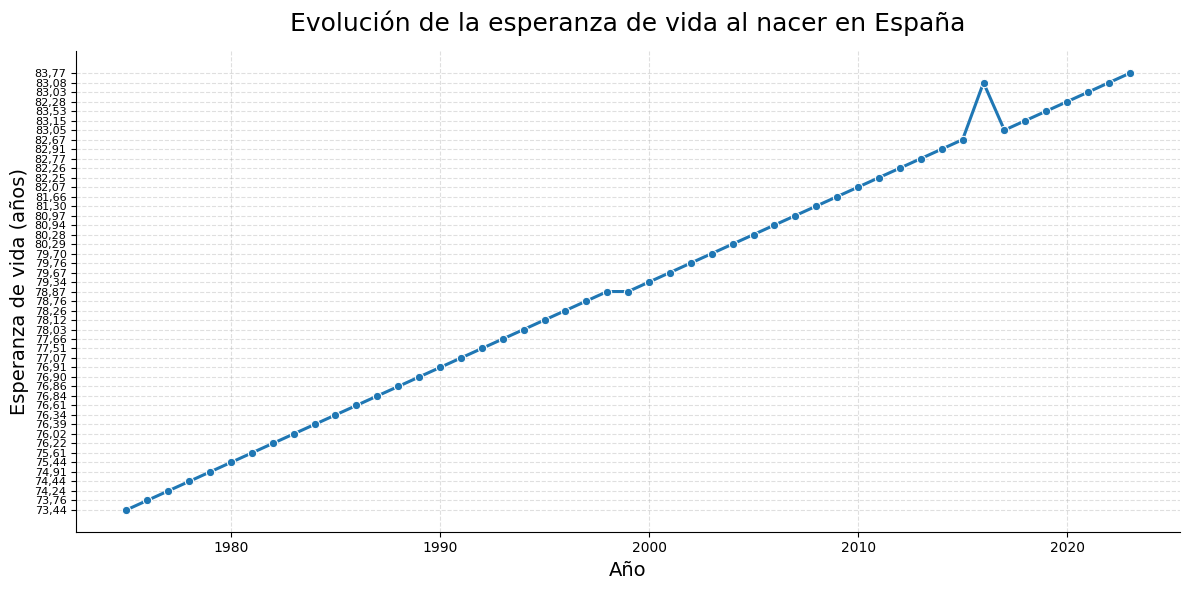

In [7]:

plt.figure(figsize=(12, 6))

sns.lineplot(
    x="Periodo",
    y="Esperanza de vida",
    data=esperanza,
    linewidth=2.2,
    marker="o",
)

plt.title("Evolución de la esperanza de vida al nacer en España", fontsize=18, pad=15)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Esperanza de vida (años)", fontsize=14)

plt.grid(True, linestyle="--", alpha=0.4)

# Quita spines superiores y derecho
sns.despine(top=True, right=True)

# Aumenta tamaño de ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()


In [8]:
nat_vs_esp=pd.merge(natalidad,esperanza, on="Periodo")

nat_vs_esp


,Periodo,Hijos x c/mil,Esperanza de vida
0,2023,"30,24","83,77"
1,2022,"31,40","83,08"
2,2021,"32,25","83,03"
3,2020,"32,42","82,28"
4,2019,"34,15","83,53"
5,2018,"35,37","83,15"
6,2017,"37,18","83,05"
7,2016,"38,50","83,08"
8,2015,"38,98","82,67"
9,2014,"39,13","82,91"


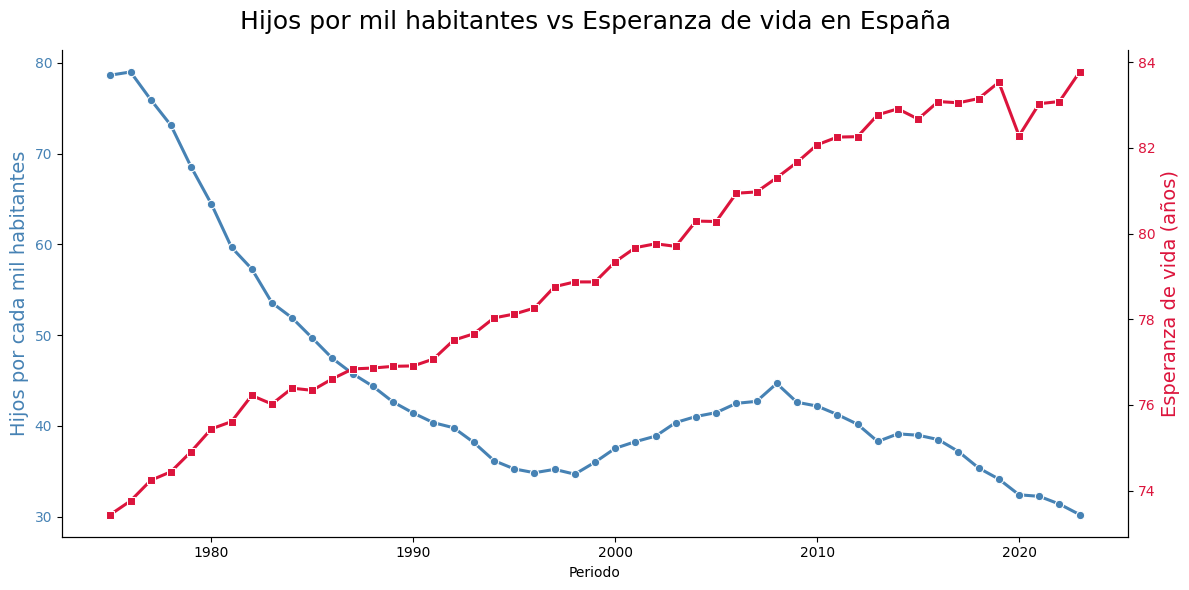

In [9]:
nat_vs_esp = nat_vs_esp.copy()

nat_vs_esp["Hijos x c/mil"] = nat_vs_esp["Hijos x c/mil"].astype(str).str.replace(",", ".").astype(float)

nat_vs_esp["Esperanza de vida"] = nat_vs_esp["Esperanza de vida"].astype(str).str.replace(",", ".").astype(float)

fig, ax1 = plt.subplots(figsize=(12,6))


sns.lineplot(
    x="Periodo",
    y="Hijos x c/mil",
    data=nat_vs_esp,
    marker="o",
    linewidth=2.2,
    color="steelblue",
    ax=ax1
)
ax1.set_ylabel("Hijos por cada mil habitantes", fontsize=14, color="steelblue")
ax1.tick_params(axis='y', labelcolor="steelblue")


ax2 = ax1.twinx()
sns.lineplot(
    x="Periodo",
    y="Esperanza de vida",
    data=nat_vs_esp,
    marker="s",
    linewidth=2.2,
    color="crimson",
    ax=ax2
)
ax2.set_ylabel("Esperanza de vida (años)", fontsize=14, color="crimson")
ax2.tick_params(axis='y', labelcolor="crimson")

plt.title("Hijos por mil habitantes vs Esperanza de vida en España", fontsize=18, pad=15)
plt.grid(axis='x', linestyle="--", alpha=0.3)

sns.despine(right=False)
plt.tight_layout()
plt.show()



In [10]:
edad_pob = pd.read_csv(r"C:\Users\GPSantana\Downloads\Poblacion residente por edad desde 1971.csv",sep=';',encoding='latin1')

edad_pob["Edad"] = edad_pob["Edad"].astype(str)

edad_pob = edad_pob[edad_pob['Periodo'].str.contains("1 de enero")]

def edad_a_int(edad):
    edad = str(edad).strip()
    if "100" in edad:
        return 102
    nums = ''.join(c for c in edad if c.isdigit())
    return int(nums) if nums else None

edad_pob["Edad_num"] = edad_pob["Edad"].apply(edad_a_int)
edad_pob = edad_pob[edad_pob["Edad_num"].notna()]

edad_pob["Total"] = (
    edad_pob["Total"]
    .astype(str)
    .str.replace(".", "", regex=False)  
    .str.replace(",", ".", regex=False) 
    .astype(float)
)



media_edad = (
    edad_pob.groupby("Periodo")
          .apply(lambda x: np.average(x["Edad_num"], weights=x["Total"]))
          .reset_index(name="Edad_media")
)

media_edad = media_edad[media_edad["Edad_media"].notna()]

media_edad

C:\Users\GPSantana\AppData\Local\Temp\ipykernel_12324\1286109459.py:29: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: np.average(x["Edad_num"], weights=x["Total"]))


,Periodo,Edad_media
10,1 de enero de 1981,33.758327
11,1 de enero de 1982,33.996945
12,1 de enero de 1983,34.272708
13,1 de enero de 1984,34.555437
14,1 de enero de 1985,34.850675
15,1 de enero de 1986,35.166811
16,1 de enero de 1987,35.495640
17,1 de enero de 1988,35.847472
18,1 de enero de 1989,36.196769
19,1 de enero de 1990,36.550074


In [11]:
midpob = pd.read_csv(r"C:\Users\GPSantana\Downloads\edad media de la poblacion.csv",sep=';',encoding='latin1')

seleccion=["Periodo","Total"]
midpob=midpob[seleccion]
midpob=midpob.rename(columns={"Total":"Media de edad"})
midpob

,Periodo,Media de edad
0,2024,"44,37"
1,2023,"44,18"
2,2022,"44,06"
3,2021,"43,79"
4,2020,"43,57"
5,2019,"43,37"
6,2018,"43,17"
7,2017,"42,95"
8,2016,"42,70"
9,2015,"42,45"


In [12]:
midpob = midpob.rename(columns={"Periodo": "Año"})
midpob["Año"] = midpob["Año"].astype(int)

esperanza = esperanza.rename(columns={"Periodo": "Año"})
esperanza["Año"] = esperanza["Año"].astype(int)

natalidad = natalidad.rename(columns={"Periodo": "Año"})
natalidad["Año"] = natalidad["Año"].astype(int)

df_total = (
    midpob
    .merge(esperanza, on="Año", how="inner")
    .merge(natalidad, on="Año", how="inner")
)
df_total



df_total["Esperanza de vida"] = (
    df_total["Esperanza de vida"]
    .astype(str)
    .str.replace(".", "", regex=False)  
    .str.replace(",", ".", regex=False) 
    .astype(float)
)

df_total["Hijos x c/mil"] = (
    df_total["Hijos x c/mil"]
    .astype(str)
    .str.replace(".", "", regex=False)  
    .str.replace(",", ".", regex=False) 
    .astype(float)
)
df_total["Media de edad"] = (
    df_total["Media de edad"]
    .astype(str)
    .str.replace(".", "", regex=False)  
    .str.replace(",", ".", regex=False) 
    .astype(float)
)
df_total

,Año,Media de edad,Esperanza de vida,Hijos x c/mil
0,2023,44.18,83.77,30.24
1,2022,44.06,83.08,31.40
2,2021,43.79,83.03,32.25
3,2020,43.57,82.28,32.42
4,2019,43.37,83.53,34.15
5,2018,43.17,83.15,35.37
6,2017,42.95,83.05,37.18
7,2016,42.70,83.08,38.50
8,2015,42.45,82.67,38.98
9,2014,42.15,82.91,39.13


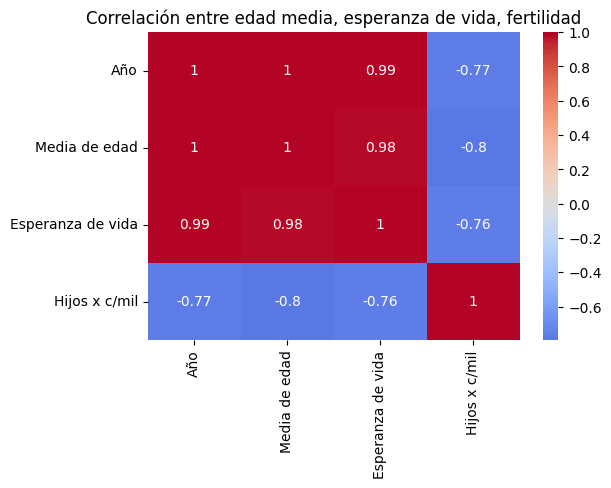

    Año  Media de edad  Esperanza de vida  Hijos x c/mil
0  2023          44.18              83.77          30.24
1  2022          44.06              83.08          31.40
2  2021          43.79              83.03          32.25
3  2020          43.57              82.28          32.42
4  2019          43.37              83.53          34.15


In [13]:
corr = df_total.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr,annot=True,cmap="coolwarm",center=0)
plt.title("Correlación entre edad media, esperanza de vida, fertilidad")
plt.show()
print(df_total.head())

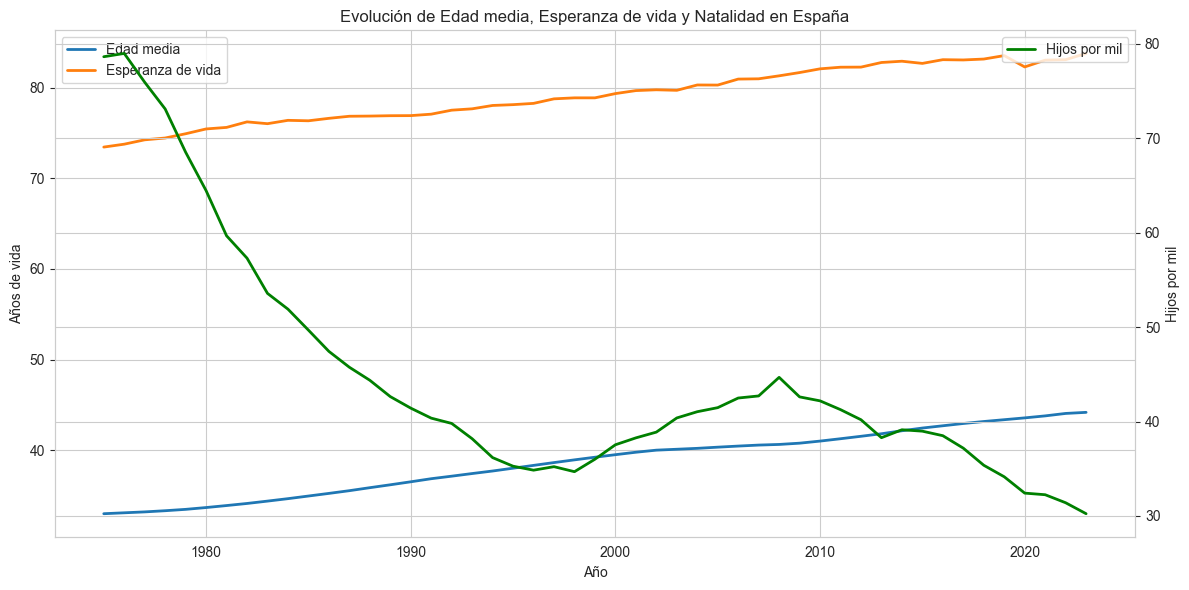

In [14]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

# Eje 1: Edad media y Esperanza de vida
ax1 = sns.lineplot(data=df_total, x="Año", y="Media de edad", label="Edad media", linewidth=2)
sns.lineplot(data=df_total, x="Año", y="Esperanza de vida", label="Esperanza de vida", linewidth=2, ax=ax1)

ax1.set_ylabel("Años de vida")

# Eje 2: Fecundidad
ax2 = ax1.twinx()
sns.lineplot(data=df_total, x="Año", y="Hijos x c/mil", label="Hijos por mil", color="green", linewidth=2, ax=ax2)
ax2.set_ylabel("Hijos por mil")

plt.title("Evolución de Edad media, Esperanza de vida y Natalidad en España")
plt.tight_layout()
plt.show()

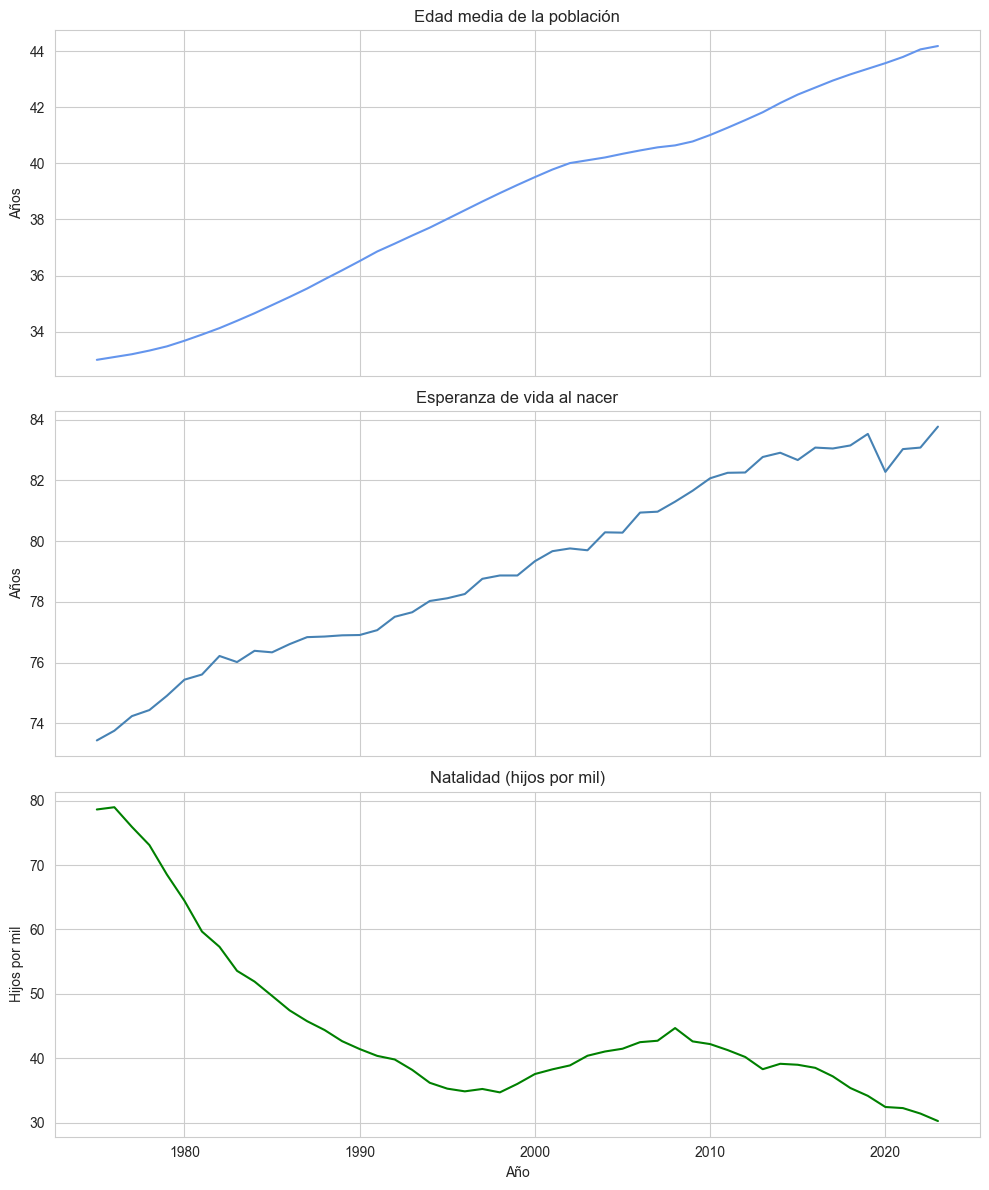

In [15]:
fig, axes = plt.subplots(3, 1, figsize=(10,12), sharex=True)
sns.set_style("whitegrid")

sns.lineplot(ax=axes[0], data=df_total, x="Año", y="Media de edad", color="cornflowerblue")
axes[0].set_title("Edad media de la población")
axes[0].set_ylabel("Años")

sns.lineplot(ax=axes[1], data=df_total, x="Año", y="Esperanza de vida", color="steelblue")
axes[1].set_title("Esperanza de vida al nacer")
axes[1].set_ylabel("Años")

sns.lineplot(ax=axes[2], data=df_total, x="Año", y="Hijos x c/mil", color="green")
axes[2].set_title("Natalidad (hijos por mil)")
axes[2].set_ylabel("Hijos por mil")
axes[2].set_xlabel("Año")

plt.tight_layout()
plt.show()


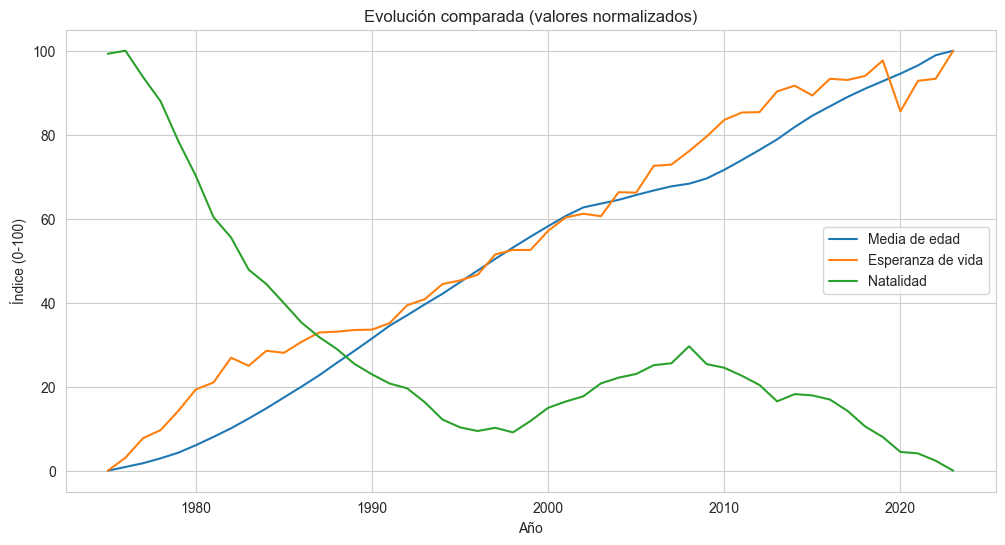

In [16]:
df_norm = df_total.copy()

for col in ["Media de edad","Esperanza de vida","Hijos x c/mil"]:
    df_norm[col] = 100 * (df_norm[col] - df_norm[col].min()) / (df_norm[col].max() - df_norm[col].min())

plt.figure(figsize=(12,6))
sns.lineplot(data=df_norm, x="Año", y="Media de edad", label="Media de edad")
sns.lineplot(data=df_norm, x="Año", y="Esperanza de vida", label="Esperanza de vida")
sns.lineplot(data=df_norm, x="Año", y="Hijos x c/mil", label="Natalidad")

plt.ylabel("Índice (0-100)")
plt.title("Evolución comparada (valores normalizados)")
plt.grid(True)
plt.show()


In [17]:
envejecimiento = pd.read_csv(r"C:\Users\GPSantana\Downloads\indice de envejecimiento.csv",sep=';',encoding='latin1')
envejecimiento

seleccion=["Periodo","Total"]
envejecimiento=envejecimiento[seleccion]
envejecimiento=envejecimiento.rename(columns={"Total":"Indice de Envejecimiento"})
envejecimiento

,Periodo,Indice de Envejecimiento
0,2024,"142,35"
1,2023,"137,33"
2,2022,"133,64"
3,2021,"129,16"
4,2020,"125,82"
5,2019,123
6,2018,"120,56"
7,2017,"118,36"
8,2016,"116,33"
9,2015,"114,69"


In [18]:
midpob = midpob.rename(columns={"Periodo": "Año"})
midpob["Año"] = midpob["Año"].astype(int)

esperanza = esperanza.rename(columns={"Periodo": "Año"})
esperanza["Año"] = esperanza["Año"].astype(int)

natalidad = natalidad.rename(columns={"Periodo": "Año"})
natalidad["Año"] = natalidad["Año"].astype(int)

envejecimiento = envejecimiento.rename(columns={"Periodo": "Año"})
envejecimiento["Año"] = envejecimiento["Año"].astype(int)

df_total2 = (
    midpob
    .merge(esperanza, on="Año", how="inner")
    .merge(natalidad, on="Año", how="inner")
    .merge(envejecimiento, on="Año", how="inner")
)


cols_convertir = [
    "Esperanza de vida",
    "Hijos x c/mil",
    "Media de edad",
    "Indice de Envejecimiento"
]

for col in cols_convertir:
    df_total2[col] = (
        df_total2[col]
        .astype(str)
        .str.replace(".", "", regex=False)
        .str.replace(",", ".", regex=False)
        .astype(float)
    )

df_total2

,Año,Media de edad,Esperanza de vida,Hijos x c/mil,Indice de Envejecimiento
0,2023,44.18,83.77,30.24,137.33
1,2022,44.06,83.08,31.40,133.64
2,2021,43.79,83.03,32.25,129.16
3,2020,43.57,82.28,32.42,125.82
4,2019,43.37,83.53,34.15,123.00
5,2018,43.17,83.15,35.37,120.56
6,2017,42.95,83.05,37.18,118.36
7,2016,42.70,83.08,38.50,116.33
8,2015,42.45,82.67,38.98,114.69
9,2014,42.15,82.91,39.13,112.63


In [19]:
df_total2.to_csv(r"C:\Users\GPSantana\Downloads\evolucion_demografica_completa.csv", index=False)


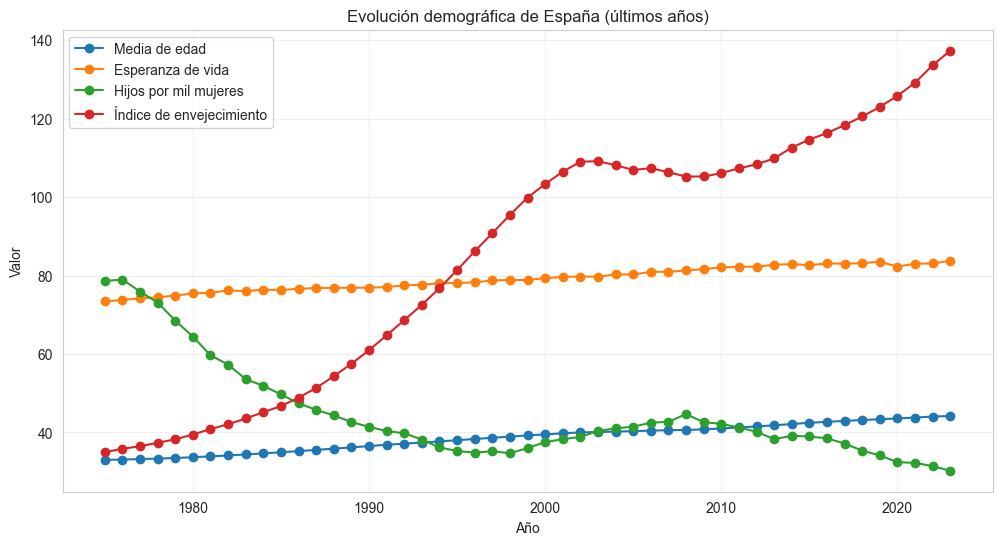

In [20]:
plt.figure(figsize=(12,6))

plt.plot(df_total2["Año"], df_total2["Media de edad"], marker="o", label="Media de edad")
plt.plot(df_total2["Año"], df_total2["Esperanza de vida"], marker="o", label="Esperanza de vida")
plt.plot(df_total2["Año"], df_total2["Hijos x c/mil"], marker="o", label="Hijos por mil mujeres")
plt.plot(df_total2["Año"], df_total2["Indice de Envejecimiento"], marker="o", label="Índice de envejecimiento")

plt.xlabel("Año")
plt.ylabel("Valor")
plt.title("Evolución demográfica de España (últimos años)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

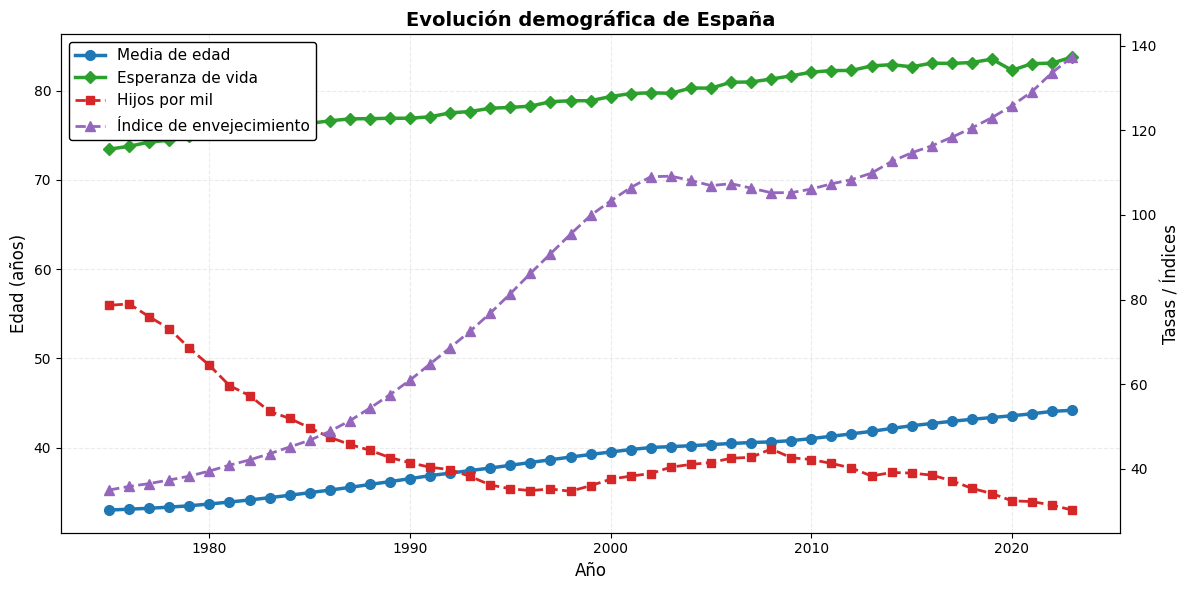

In [ ]:
plt.style.use("default")

fig, ax1 = plt.subplots(figsize=(12, 6))

c_media = "#1f77b4"       # azul
c_esperanza = "#2ca02c"   # verde
c_hijos = "#d62728"       # rojo
c_envejec = "#9467bd"     # púrpura


ax1.plot(df_total2["Año"], df_total2["Media de edad"],
         marker="o", markersize=7, linewidth=2.5, color=c_media,
         label="Media de edad")

ax1.plot(df_total2["Año"], df_total2["Esperanza de vida"],
         marker="D", markersize=6, linewidth=2.5, color=c_esperanza,
         label="Esperanza de vida")

ax1.set_xlabel("Año", fontsize=12)
ax1.set_ylabel("Edad (años)", fontsize=12)
ax1.grid(linestyle="--", alpha=0.25)


ax2 = ax1.twinx()

ax2.plot(df_total2["Año"], df_total2["Hijos x c/mil"],
         marker="s", markersize=6, linewidth=2, linestyle="--", color=c_hijos,
         label="Hijos por mil")

ax2.plot(df_total2["Año"], df_total2["Indice de Envejecimiento"],
         marker="^", markersize=7, linewidth=2, linestyle="--", color=c_envejec,
         label="Índice de envejecimiento")

ax2.set_ylabel("Tasas / Índices", fontsize=12)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2,
           loc="upper left", fontsize=11, framealpha=1, edgecolor="black")

plt.title("Evolución demográfica de España", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()
